(chang_credible)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Credible Government Policies in a Model of Chang

```{contents} Contents
:depth: 2
```

In addition to what's in Anaconda, this lecture will need the following libraries:

In [1]:
!pip install polytope quantecon

## Overview

Some of the material in this lecture and {doc}`competitive equilibria in the Chang model <chang_ramsey>`
can be viewed as more sophisticated and complete treatments of the topics discussed in
{doc}`Ramsey plans, time inconsistency, sustainable plans <calvo>`.

This lecture assumes almost  the same economic environment analyzed in
{doc}`competitive equilibria in the Chang model <chang_ramsey>`.

The only change  --  and it is a substantial one -- is the timing protocol for making government decisions.

In  {doc}`competitive equilibria in the Chang model <chang_ramsey>`, a *Ramsey planner*
chose a comprehensive government policy once-and-for-all at time $0$.

Now in this lecture, there is no time $0$ Ramsey planner.

Instead there is a sequence of government decision-makers, one for each $t$.

The time $t$ government decision-maker choose time $t$ government
actions after forecasting what future governments will do.

We use the notion of a *sustainable plan* proposed in {cite}`chari1990sustainable`,
also referred to as a *credible public policy* in {cite}`stokey1989reputation`.

Technically, this lecture starts where lecture
{doc}`competitive equilibria in the Chang model <chang_ramsey>` on Ramsey plans
within the Chang {cite}`chang1998credible` model stopped.

That lecture presents recursive representations of  *competitive equilibria* and a *Ramsey plan* for a
version of a model of Calvo {cite}`Calvo1978` that Chang used to analyze and illustrate these concepts.

We used two operators to characterize competitive equilibria and a Ramsey plan,
respectively.

In this lecture, we define a *credible public policy* or *sustainable plan*.

Starting from a large enough initial set $Z_0$, we use iterations on
Chang's set-to-set  operator $\tilde D(Z)$ to
compute a set of values associated with sustainable plans.

Chang's operator $\tilde D(Z)$ is closely connected with the operator
$D(Z)$ introduced in lecture {doc}`competitive equilibria in the Chang model <chang_ramsey>`.

* $\tilde D(Z)$ incorporates all of the restrictions imposed in
  constructing the operator $D(Z)$, but $\ldots$.
* It adds some additional restrictions
    * these additional restrictions incorporate the idea that a plan must be *sustainable*.
    * *sustainable* means that the government wants to implement it at all times after all histories.

Let's start with some standard imports:

In [2]:
import numpy as np
import quantecon as qe
import polytope
import matplotlib.pyplot as plt
%matplotlib inline

## The Setting

We begin by reviewing the set up deployed in  {doc}`competitive equilibria in the Chang model <chang_ramsey>`.

Chang's  model, adopted from Calvo, is designed to focus on the intertemporal trade-offs between
the welfare benefits of deflation and the welfare costs associated with
the high tax collections required to retire money at a rate that
delivers deflation.

A benevolent time $0$ government can promote
utility generating increases in real balances only by imposing an
infinite sequence of sufficiently large distorting tax collections.

To promote the welfare increasing effects of high real balances, the
government wants to induce  *gradual deflation*.

We start by reviewing notation.

For a sequence of scalars
$\vec z \equiv \{z_t\}_{t=0}^\infty$, let
$\vec z^t = (z_0,  \ldots , z_t)$,
$\vec z_t = (z_t, z_{t+1}, \ldots )$.

An infinitely lived
representative agent and an infinitely lived government exist at dates
$t = 0, 1, \ldots$.

The objects in play are

* an initial quantity $M_{-1}$ of nominal money holdings
* a sequence of inverse money growth rates $\vec h$ and an associated sequence of nominal money holdings $\vec M$
* a sequence of values of money $\vec q$
* a sequence of real money holdings $\vec m$
* a sequence of total tax collections $\vec x$
* a sequence of per capita rates of consumption $\vec c$
* a sequence of per capita incomes $\vec y$

A benevolent government chooses sequences
$(\vec M, \vec h, \vec x)$ subject to a sequence of budget
constraints and other constraints imposed by competitive equilibrium.

Given tax collection and price of money sequences, a representative household chooses
sequences $(\vec c, \vec m)$ of consumption and real balances.

In competitive equilibrium, the price of money sequence $\vec q$ clears
markets, thereby reconciling  decisions of the government and the
representative household.

### The Household’s Problem

A representative household faces a nonnegative value of money sequence
$\vec q$ and sequences $\vec y, \vec x$ of income and total
tax collections, respectively.

The household chooses nonnegative
sequences $\vec c, \vec M$ of consumption and nominal balances,
respectively, to maximize

```{math}
:label: eqn_chang1

\sum_{t=0}^\infty \beta^t \left[ u(c_t) + v(q_t M_t ) \right]
```

subject to

```{math}
:label: eqn_chang2

q_t M_t  \leq y_t + q_t M_{t-1} - c_t - x_t
```

and

```{math}
:label: eqn_chang3

q_t M_t  \leq \bar m
```

Here $q_t$ is the reciprocal of the price level at $t$,
also known as the *value of money*.

Chang {cite}`chang1998credible` assumes that

* $u: \mathbb{R}_+ \rightarrow \mathbb{R}$ is twice continuously differentiable, strictly concave, and strictly increasing;
* $v: \mathbb{R}_+ \rightarrow \mathbb{R}$ is twice continuously differentiable and strictly concave;
* $u'(c)_{c \rightarrow 0}  = \lim_{m \rightarrow 0} v'(m) = +\infty$;
* there is a finite level $m= m^f$ such that $v'(m^f) =0$

Real balances carried out of a period equal $m_t = q_t M_t$.

Inequality {eq}`eqn_chang2` is the household’s time $t$ budget constraint.

It tells how real balances $q_t M_t$ carried out of period $t$ depend
on income, consumption, taxes, and real balances $q_t M_{t-1}$
carried into the period.

Equation {eq}`eqn_chang3` imposes an exogenous upper bound
$\bar m$ on the choice of real balances, where
$\bar m \geq m^f$.

### Government

The government chooses a sequence of inverse money growth rates with
time $t$ component
$h_t \equiv {M_{t-1}\over M_t} \in \Pi \equiv
[ \underline \pi, \overline \pi]$, where
$0 < \underline \pi < 1 < { 1 \over \beta } \leq \overline \pi$.

The government faces a sequence of budget constraints with time
$t$ component

$$
-x_t = q_t (M_t - M_{t-1})
$$

which, by using the definitions of $m_t$ and $h_t$, can also
be expressed as

```{math}
:label: eqn_chang2a

-x_t = m_t (1-h_t)
```

The  restrictions $m_t \in [0, \bar m]$ and $h_t \in \Pi$ evidently
imply that $x_t \in X \equiv [(\underline  \pi -1)\bar m, (\overline \pi -1) \bar m]$.

We define the set $E \equiv [0,\bar m] \times \Pi \times X$, so that we
require that $(m, h, x) \in E$.

To represent the idea that taxes are distorting, Chang makes the following
assumption about outcomes for per capita output:

```{math}
:label: eqn_chang3a

y_t = f(x_t)
```

where $f: \mathbb{R}\rightarrow \mathbb{R}$ satisfies $f(x)  > 0$,
is twice continuously differentiable, $f''(x) < 0$, and
$f(x) = f(-x)$ for all $x \in
\mathbb{R}$, so that subsidies and taxes are equally distorting.

The purpose is not to model the causes of tax distortions in any detail but simply to summarize
the *outcome* of those distortions via the function $f(x)$.

A key part of the specification is that tax distortions are increasing in the
absolute value of tax revenues.

The government chooses a competitive equilibrium that
maximizes {eq}`eqn_chang1`.

### Within-period Timing Protocol

For the results in this lecture, the *timing* of actions within a period is
important because of the incentives that it activates.

Chang assumed the following within-period timing of decisions:

* first, the government chooses $h_t$ and $x_t$;
* then given $\vec q$ and its expectations about future values of
  $x$ and $y$’s, the household chooses $M_t$ and therefore
  $m_t$ because $m_t = q_t M_t$;
* then output $y_t = f(x_t)$ is realized;
* finally $c_t = y_t$

This within-period timing confronts the government with
choices framed by how the private sector wants to respond when the
government takes time $t$ actions that differ from what the
private sector had expected.

This timing will shape the incentives confronting the government at each
history that are to be incorporated in the construction of the $\tilde D$
operator below.

### Household’s Problem

Given $M_{-1}$ and $\{q_t\}_{t=0}^\infty$, the household’s problem is

$$
\begin{aligned}
\mathcal{L} & = \max_{\vec c, \vec M}
\min_{\vec \lambda, \vec \mu} \sum_{t=0}^\infty \beta^t
\bigl\{ u(c_t) + v(M_t q_t) +
\lambda_t [ y_t - c_t - x_t + q_t M_{t-1} - q_t M_t ]  \\
& \quad \quad \quad  + \mu_t [\bar m - q_t  M_t] \bigr\}
\end{aligned}
$$

First-order conditions with respect to $c_t$ and $M_t$, respectively, are

$$
\begin{aligned}
u'(c_t) & = \lambda_t \\
q_t [ u'(c_t) - v'(M_t q_t) ] & \leq \beta u'(c_{t+1})
q_{t+1} , \quad = \ {\rm if} \ M_t q_t < \bar m
\end{aligned}
$$

Using $h_t = {M_{t-1}\over M_t}$ and $q_t = {m_t \over M_t}$ in
these first-order conditions and rearranging implies

```{math}
:label: eqn_chang4

m_t [u'(c_t) - v'(m_t) ] \leq \beta u'(f(x_{t+1})) m_{t+1} h_{t+1},
\quad = \text{ if } m_t < \bar m
```

Define the following key variable

```{math}
:label: eqn_chang5

\theta_{t+1} \equiv u'(f(x_{t+1})) m_{t+1} h_{t+1}
```

This is real money balances at time $t+1$ measured in units of marginal
utility, which Chang refers to as ‘the marginal utility of real balances’.

From the standpoint of the household at time $t$, equation {eq}`eqn_chang5`
shows that $\theta_{t+1}$ intermediates the influences of
$(\vec x_{t+1}, \vec m_{t+1})$ on the household’s choice of real
balances $m_t$.

By "intermediates" we mean that the future paths
$(\vec x_{t+1}, \vec m_{t+1})$ influence $m_t$ entirely through
their effects on the scalar $\theta_{t+1}$.

The observation that the one dimensional promised marginal utility of real
balances $\theta_{t+1}$ functions in this way is an important step
in constructing a class of competitive equilibria that have a recursive representation.

A closely related observation pervaded the analysis of Stackelberg plans in
{doc}`dynamic Stackelberg problems <dyn_stack>` and {doc}`the Calvo model <calvo>`.

### Competitive Equilibrium

**Definition:**

* A *government policy* is a pair of sequences $(\vec h,\vec x)$ where $h_t \in \Pi  \ \forall t \geq 0$.
* A *price system* is a non-negative value of money sequence $\vec q$.
* An *allocation* is a  triple of non-negative sequences $(\vec c, \vec m, \vec y)$.

It is required that time $t$ components $(m_t, x_t, h_t) \in E$.

**Definition:**

Given $M_{-1}$, a government policy $(\vec h, \vec x)$, price system $\vec q$, and allocation
$(\vec c, \vec m, \vec y)$ are said to be a *competitive equilibrium* if

* $m_t = q_t M_t$ and $y_t = f(x_t)$.
* The government budget constraint is satisfied.
* Given $\vec q, \vec x, \vec y$, $(\vec c, \vec m)$ solves the household’s problem.

### A Credible Government Policy

Chang works with

**A credible government policy with a recursive representation**

* Here there is no time $0$ Ramsey planner.
* Instead there is a sequence of governments, one for each $t$, that
  choose time $t$ government actions after forecasting what future governments will do.
* Let $w=\sum_{t=0}^\infty \beta^t \left[ u(c_t) + v(q_t M_t ) \right]$
  be a value associated with a particular competitive equilibrium.
* A recursive representation of a credible government policy is a pair of
  initial conditions $(w_0, \theta_0)$ and a five-tuple of functions
  
  $$
  h(w_t, \theta_t), m(h_t, w_t, \theta_t), x(h_t, w_t, \theta_t), \chi(h_t, w_t, \theta_t),\Psi(h_t, w_t, \theta_t)
  $$
  mapping $w_t,\theta_t$ and in some cases $h_t$ into
  $\hat h_t, m_t, x_t, w_{t+1}$, and $\theta_{t+1}$, respectively.
* Starting from an initial condition $(w_0, \theta_0)$, a credible
  government policy can be constructed by iterating on these functions in
  the following order that respects the within-period timing:
  
  ```{math}
  :label: chang501
  
  \begin{aligned}
  \hat h_t & = h(w_t,\theta_t) \\
  m_t & = m(h_t, w_t,\theta_t) \\
  x_t & = x(h_t, w_t,\theta_t) \\
  w_{t+1} & = \chi(h_t, w_t,\theta_t)  \\
  \theta_{t+1}  & = \Psi(h_t, w_t,\theta_t)
  \end{aligned}
  ```
  
* Here it is to be understood that $\hat h_t$ is the action that the
  government policy instructs the government to take, while $h_t$
  possibly not equal to $\hat h_t$ is some other action that the
  government is free to take at time $t$.

The plan is *credible* if it is in the time $t$ government’s interest to
execute it.

Credibility requires that the plan be such that for all possible choices of
$h_t$ that are consistent with competitive equilibria,

$$
\begin{split} & u(f(x(\hat h_t, w_t,\theta_t))) + v(m(\hat h_t, w_t,\theta_t))  + \beta \chi(\hat h_t, w_t,\theta_t) \\
&  \geq
u(f(x( h_t, w_t,\theta_t))) + v(m(h_t, w_t,\theta_t)) + \beta \chi(h_t, w_t,\theta_t) \end{split}
$$

so that at each instance and circumstance of choice, a government attains a
weakly higher lifetime utility with continuation value
$w_{t+1}=\Psi(h_t, w_t,\theta_t)$ by adhering to the plan and
confirming the associated time $t$ action $\hat h_t$ that
the public had expected earlier.

Please note the subtle change in arguments of the functions used to represent
a competitive equilibrium and a Ramsey plan, on the one hand, and a credible
government plan, on the other hand.

The extra arguments appearing in the functions used to represent a credible plan
come from allowing the government to contemplate disappointing the private sector’s
expectation about its time $t$ choice $\hat h_t$.

A credible plan induces the government to confirm the private sector’s expectation.

The recursive representation of the plan uses the evolution of continuation
values to deter the government from wanting to disappoint the private sector’s
expectations.

Technically, a Ramsey plan and a credible plan  both incorporate history dependence.

For a Ramsey plan, this is encoded in the dynamics of the state variable
$\theta_t$, a promised marginal utility that the Ramsey plan delivers to
the private sector.

For a credible government plan, we the two-dimensional state vector
$(w_t, \theta_t)$ encodes  history dependence.

### Sustainable Plans

A government strategy $\sigma$ and an allocation rule
$\alpha$ are said to constitute a *sustainable plan* (SP) if.

1. $\sigma$ is admissible.
1. Given $\sigma$, $\alpha$ is competitive.
1. After any history $\vec h^{t-1}$, the continuation of $\sigma$
   is optimal for the government; i.e., the sequence $\vec h_t$ induced
   by $\sigma$ after $\vec h^{t-1}$ maximizes over $CE_\pi$
   given $\alpha$.

Given any history $\vec h^{t-1}$, the continuation of a sustainable plan is a
sustainable plan.

Let $\Theta = \{ (\vec m, \vec x, \vec h) \in CE : \text{there is an SP whose outcome is} (\vec m, \vec x, \vec h) \}$.

Sustainable outcomes are elements of $\Theta$.

Now consider the space

$$
S = \Bigl\{ (w,\theta) : \text{there is a sustainable outcome }
    (\vec m, \vec x, \vec h) \in \Theta
$$

with value

$$
w = \sum_{t=0}^\infty \beta^t [u(f(x_t)) + v(m_t)]  \text{ and such that }
     u'(f(x_0)) (m_0 + x_0) = \theta \Bigr\}
$$

The space $S$ is a compact subset of $W \times \Omega$
where $W = [\underline w, \overline w]$ is the space of values
associated with sustainable plans. Here $\underline w$ and
$\overline w$ are finite bounds on the set of values.

Because there is at least one sustainable plan, $S$ is nonempty.

Now recall the within-period timing protocol, which we can depict
$(h,x) \rightarrow m=q M \rightarrow y = c$.

With this timing protocol in mind, the time $0$ component of an SP has the
following components:

1. A period $0$ action $\hat h \in \Pi$ that the public
   expects the government to take, together with subsequent within-period
   consequences $m(\hat h), x(\hat h)$ when the government acts as
   expected.
1. For any first-period action $h \neq \hat h$ with
   $h \in CE_\pi^0$, a pair of within-period consequences
   $m(h), x(h)$ when the government does not act as the public had
   expected.
1. For every $h \in \Pi$, a pair
   $(w'(h), \theta'(h))\in S$ to carry into next period.

These components must be such that it is optimal for the government to
choose $\hat h$ as expected; and for every possible
$h \in \Pi$, the government budget constraint and the household’s
Euler equation must hold with continuation $\theta$ being
$\theta'(h)$.

Given the timing protocol within the model, the representative
household’s response to a government deviation to $h \neq \hat h$
from a prescribed $\hat h$ consists of a first-period action
$m(h)$ and associated subsequent actions, together with future
equilibrium prices, captured by $(w'(h), \theta'(h))$.

At this point, Chang introduces an idea in the spirit of Abreu, Pearce, and Stacchetti {cite}`APS1990`.

Let $Z$ be a nonempty subset of $W \times \Omega$.

Think of using pairs $(w', \theta')$ drawn from $Z$ as candidate
continuation value, promised marginal utility pairs.

Define the following operator:

```{math}
:label: chang_operator

\begin{aligned}
\tilde D(Z) = \Bigl\{
(w,\theta): \text{there is } \hat h \in CE_\pi^0 \text{ and for each } h \in CE_\pi^0 \\
\text{ a four-tuple } (m(h), x(h), w'(h), \theta'(h)) \in [0,\bar m] \times X \times Z
\end{aligned}
```

such that

```{math}
:label: eqn_chang12

w = u(f(x(\hat h)))+ v(m(\hat h)) + \beta w'(\hat h)
```

```{math}
:label: eqn_chang13

\theta = u'(f(x(\hat h))) ( m(\hat h) + x(\hat h))
```

and for all $h \in CE_\pi^0$

```{math}
:label: eqn_chang14

w \geq u(f(x(h))) + v(m(h)) + \beta w'(h)
```

```{math}
:label: eqn_chang_15

x(h) = m(h) (h-1)
```

and

```{math}
:label: eqn_chang16

m(h) (u'(f(x(h))) - v'(m(h))) \leq \beta \theta'(h)
```

$$
\quad \quad \ \text{ with equality if } m(h) < \bar m  \Bigr\}
$$

This operator adds the key incentive constraint to the conditions that
had defined the earlier $D(Z)$ operator defined in  {doc}`competitive equilibria in the Chang model <chang_ramsey>`.

Condition {eq}`eqn_chang14` requires that the plan deter the government from wanting to
take one-shot deviations when candidate continuation values are drawn
from $Z$.

**Proposition:**

1. If $Z \subset \tilde D(Z)$, then $\tilde D(Z) \subset S$ (‘self-generation’).
1. $S = \tilde D(S)$ (‘factorization’).

**Proposition:**.

1. Monotonicity of $\tilde D$: $Z \subset Z'$ implies $\tilde D(Z) \subset \tilde D(Z')$.
1. $Z$ compact implies that $\tilde D(Z)$ is compact.

Chang establishes that $S$ is compact and that therefore there
exists a highest value SP and a lowest value SP.

Further, the preceding structure allows Chang to compute $S$ by iterating to convergence
on $\tilde D$ provided that one begins with a sufficiently large
initial set $Z_0$.

This structure delivers the following recursive representation of a
sustainable outcome:

1. choose an initial $(w_0, \theta_0) \in S$;
1. generate a sustainable outcome recursively by iterating on {eq}`chang501`, which we repeat here for convenience:

   $$
   \begin{aligned}
   \hat h_t & = h(w_t,\theta_t) \\
   m_t & = m(h_t, w_t,\theta_t) \\
   x_t & = x(h_t, w_t,\theta_t) \\
   w_{t+1} & = \chi(h_t, w_t,\theta_t)  \\
   \theta_{t+1}  & = \Psi(h_t, w_t,\theta_t)
   \end{aligned}
   $$

## Calculating the Set of Sustainable Promise-Value Pairs

Above we defined the $\tilde D(Z)$ operator as {eq}`chang_operator`.

Chang (1998) provides a method for dealing with the final three
constraints.

These incentive constraints ensure that the government wants to choose
$\hat h$ as the private sector had expected it to.

Chang's simplification starts from the idea that, when considering
whether or not to confirm the private sector's expectation, the
government only needs to consider the payoff of the *best* possible
deviation.

Equally, to provide incentives to the government, we only need to
consider the harshest possible punishment.

Let $h$ denote some possible deviation. Chang defines:

$$
P(h;Z) = \min u(f(x)) + v(m) + \beta w'
$$

where the minimization is subject to

$$
x = m(h-1)
$$

$$
m(h)(u'(f(x(h))) + v'(m(h))) \leq \beta \theta'(h) \text{ (with equality if } m(h) < \bar m) \}
$$

$$
(m,x,w',\theta') \in [0,\bar m] \times X \times Z
$$

For a given deviation $h$, this problem finds the worst possible
sustainable value.

We then define:

$$
BR(Z) = \max P(h;Z) \text{ subject to } h \in CE^0_\pi
$$

$BR(Z)$ is the value of the government's most tempting deviation.

With this in hand, we can define a new operator $E(Z)$ that is
equivalent to the $\tilde D(Z)$ operator but simpler to
implement:

$$
E(Z) = \Bigl\{ (w,\theta): \exists  h \in CE^0_\pi \text{ and } (m(h),x(h),w'(h),\theta'(h)) \in [0,\bar m] \times X \times Z
$$

such that

$$
w = u(f(x(h))) + v(m(h)) + \beta w'(h)
$$

$$
\theta = u'(f(x(h)))(m(h) + x(h))
$$

$$
x(h) = m(h)(h-1)
$$

$$
m(h)(u'(f(x(h))) - v'(m(h))) \leq \beta \theta'(h) \text{ (with equality if } m(h) < \bar m)
$$

and

$$
w \geq BR(Z) \Bigr\}
$$

Aside from the final incentive constraint, this is the same as the
operator in  {doc}`competitive equilibria in the Chang model <chang_ramsey>`.

Consequently, to implement this operator we just need to add one step to
our *outer hyperplane approximation algorithm* :

1. Initialize subgradients, $H$, and hyperplane levels,
   $C_0$.
1. Given a set of subgradients, $H$, and hyperplane levels,
   $C_t$, calculate $BR(S_t)$.
1. Given $H$, $C_t$, and $BR(S_t)$, for each
   subgradient $h_i \in H$:
    - Solve a linear program (described below) for each action in the
      action space.
    - Find the maximum and update the corresponding hyperplane level,
      $C_{i,t+1}$.
1. If $|C_{t+1}-C_t| > \epsilon$, return to 2.

**Step 1** simply creates a large initial set $S_0$.

Given some set $S_t$, **Step 2** then constructs the value
$BR(S_t)$.

To do this, we solve the following problem for each point in the action
space $(m_j,h_j)$:

$$
\min_{[w',\theta']} u(f(x_j)) + v(m_j) + \beta w'
$$

subject to

$$
H \cdot (w',\theta') \leq C_t
$$

$$
x_j = m_j(h_j-1)
$$

$$
m_j(u'(f(x_j)) - v'(m_j)) \leq \beta \theta'\hspace{2mm} (= \text{if } m_j < \bar m)
$$

This gives us a matrix of possible values, corresponding to each point
in the action space.

To find $BR(Z)$, we minimize over the $m$ dimension and
maximize over the $h$ dimension.

**Step 3** then constructs the set $S_{t+1} = E(S_t)$. The linear
program in Step 3 is designed to construct a set $S_{t+1}$ that is
as large as possible while satisfying the constraints of the
$E(S)$ operator.

To do this, for each subgradient $h_i$, and for each point in the
action space $(m_j,h_j)$, we solve the following problem:

$$
\max_{[w',\theta']} h_i \cdot (w,\theta)
$$

subject to

$$
H \cdot (w',\theta') \leq C_t
$$

$$
w = u(f(x_j)) + v(m_j) + \beta w'
$$

$$
\theta = u'(f(x_j))(m_j + x_j)
$$

$$
x_j = m_j(h_j-1)
$$

$$
m_j(u'(f(x_j)) - v'(m_j)) \leq \beta \theta'\hspace{2mm} (= \text{if } m_j < \bar m)
$$

$$
w \geq BR(Z)
$$

This problem maximizes the hyperplane level for a given set of actions.

The second part of Step 3 then finds the maximum possible hyperplane
level across the action space.

The algorithm constructs a sequence of progressively smaller sets $S_{t+1} \subset S_t \subset S_{t-1} \cdots
\subset S_0$.

**Step 4** ends the algorithm when the difference between these sets is
small enough.

We have created a Python class that solves the model assuming the
following functional forms:

$$
u(c) = log(c)
$$

$$
v(m) = \frac{1}{500}(m \bar m - 0.5m^2)^{0.5}
$$

$$
f(x) = 180 - (0.4x)^2
$$

The remaining parameters $\{\beta, \bar m, \underline h, \bar h\}$
are then variables to be specified for an instance of the Chang class.

Below we use the class to solve the model and plot the resulting
equilibrium set, once with $\beta = 0.3$ and once with
$\beta = 0.8$. We also plot the (larger) competitive equilibrium
sets, which we described in  {doc}`competitive equilibria in the Chang model <chang_ramsey>`.

(We have set the number of subgradients to 10 in order to speed up the
code for now. We can increase accuracy by increasing the number of subgradients)

The following code computes sustainable plans

In [3]:
"""
Provides a class called ChangModel to solve different
parameterizations of the Chang (1998) model.
"""

import numpy as np
import quantecon as qe
import time

from scipy.spatial import ConvexHull
from scipy.optimize import linprog, minimize, minimize_scalar
from scipy.interpolate import UnivariateSpline
import numpy.polynomial.chebyshev as cheb


class ChangModel:
    """
    Class to solve for the competitive and sustainable sets in the Chang (1998)
    model, for different parameterizations.
    """

    def __init__(self, β, mbar, h_min, h_max, n_h, n_m, N_g):
        # Record parameters
        self.β, self.mbar, self.h_min, self.h_max = β, mbar, h_min, h_max
        self.n_h, self.n_m, self.N_g = n_h, n_m, N_g

        # Create other parameters
        self.m_min = 1e-9
        self.m_max = self.mbar
        self.N_a = self.n_h*self.n_m

        # Utility and production functions
        uc = lambda c: np.log(c)
        uc_p = lambda c: 1/c
        v = lambda m: 1/500 * (mbar * m - 0.5 * m**2)**0.5
        v_p = lambda m: 0.5/500 * (mbar * m - 0.5 * m**2)**(-0.5) * (mbar - m)
        u = lambda h, m: uc(f(h, m)) + v(m)

        def f(h, m):
            x = m * (h - 1)
            f = 180 - (0.4 * x)**2
            return f

        def θ(h, m):
            x = m * (h - 1)
            θ = uc_p(f(h, m)) * (m + x)
            return θ

        # Create set of possible action combinations, A
        A1 = np.linspace(h_min, h_max, n_h).reshape(n_h, 1)
        A2 = np.linspace(self.m_min, self.m_max, n_m).reshape(n_m, 1)
        self.A = np.concatenate((np.kron(np.ones((n_m, 1)), A1),
                                 np.kron(A2, np.ones((n_h, 1)))), axis=1)

        # Pre-compute utility and output vectors
        self.euler_vec = -np.multiply(self.A[:, 1], \
            uc_p(f(self.A[:, 0], self.A[:, 1])) - v_p(self.A[:, 1]))
        self.u_vec = u(self.A[:, 0], self.A[:, 1])
        self.Θ_vec = θ(self.A[:, 0], self.A[:, 1])
        self.f_vec = f(self.A[:, 0], self.A[:, 1])
        self.bell_vec = np.multiply(uc_p(f(self.A[:, 0],
                                   self.A[:, 1])),
                                   np.multiply(self.A[:, 1],
                                   (self.A[:, 0] - 1))) \
                        + np.multiply(self.A[:, 1],
                                      v_p(self.A[:, 1]))

        # Find extrema of (w, θ) space for initial guess of equilibrium sets
        p_vec = np.zeros(self.N_a)
        w_vec = np.zeros(self.N_a)
        for i in range(self.N_a):
            p_vec[i] = self.Θ_vec[i]
            w_vec[i] = self.u_vec[i]/(1 - β)

        w_space = np.array([min(w_vec[~np.isinf(w_vec)]),
                            max(w_vec[~np.isinf(w_vec)])])
        p_space = np.array([0, max(p_vec[~np.isinf(w_vec)])])
        self.p_space = p_space

        # Set up hyperplane levels and gradients for iterations
        def SG_H_V(N, w_space, p_space):
            """
            This function  initializes the subgradients, hyperplane levels,
            and extreme points of the value set by choosing an appropriate
            origin and radius. It is based on a similar function in QuantEcon's
            Games.jl
            """

            # First, create a unit circle. Want points placed on [0, 2π]
            inc = 2 * np.pi / N
            degrees = np.arange(0, 2 * np.pi, inc)

            # Points on circle
            H = np.zeros((N, 2))
            for i in range(N):
                x = degrees[i]
                H[i, 0] = np.cos(x)
                H[i, 1] = np.sin(x)

            # Then calculate origin and radius
            o = np.array([np.mean(w_space), np.mean(p_space)])
            r1 = max((max(w_space) - o[0])**2, (o[0] - min(w_space))**2)
            r2 = max((max(p_space) - o[1])**2, (o[1] - min(p_space))**2)
            r = np.sqrt(r1 + r2)

            # Now calculate vertices
            Z = np.zeros((2, N))
            for i in range(N):
                Z[0, i] = o[0] + r*H.T[0, i]
                Z[1, i] = o[1] + r*H.T[1, i]

            # Corresponding hyperplane levels
            C = np.zeros(N)
            for i in range(N):
                C[i] = np.dot(Z[:, i], H[i, :])

            return C, H, Z

        C, self.H, Z = SG_H_V(N_g, w_space, p_space)
        C = C.reshape(N_g, 1)
        self.c0_c, self.c0_s, self.c1_c, self.c1_s = np.copy(C), np.copy(C), \
            np.copy(C), np.copy(C)
        self.z0_s, self.z0_c, self.z1_s, self.z1_c = np.copy(Z), np.copy(Z), \
            np.copy(Z), np.copy(Z)

        self.w_bnds_s, self.w_bnds_c = (w_space[0], w_space[1]), \
            (w_space[0], w_space[1])
        self.p_bnds_s, self.p_bnds_c = (p_space[0], p_space[1]), \
            (p_space[0], p_space[1])

        # Create dictionaries to save equilibrium set for each iteration
        self.c_dic_s, self.c_dic_c = {}, {}
        self.c_dic_s[0], self.c_dic_c[0] = self.c0_s, self.c0_c

    def solve_worst_spe(self):
        """
        Method to solve for BR(Z). See p.449 of Chang (1998)
        """

        p_vec = np.full(self.N_a, np.nan)
        c = [1, 0]

        # Pre-compute constraints
        aineq_mbar = np.vstack((self.H, np.array([0, -self.β])))
        bineq_mbar = np.vstack((self.c0_s, 0))

        aineq = self.H
        bineq = self.c0_s
        aeq = [[0, -self.β]]

        for j in range(self.N_a):
            # Only try if consumption is possible
            if self.f_vec[j] > 0:
                # If m = mbar, use inequality constraint
                if self.A[j, 1] == self.mbar:
                    bineq_mbar[-1] = self.euler_vec[j]
                    res = linprog(c, A_ub=aineq_mbar, b_ub=bineq_mbar,
                                  bounds=(self.w_bnds_s, self.p_bnds_s))
                else:
                    beq = self.euler_vec[j]
                    res = linprog(c, A_ub=aineq, b_ub=bineq, A_eq=aeq, b_eq=beq,
                                  bounds=(self.w_bnds_s, self.p_bnds_s))
                if res.status == 0:
                    p_vec[j] = self.u_vec[j] + self.β * res.x[0]

        # Max over h and min over other variables (see Chang (1998) p.449)
        self.br_z = np.nanmax(np.nanmin(p_vec.reshape(self.n_m, self.n_h), 0))

    def solve_subgradient(self):
        """
        Method to solve for E(Z). See p.449 of Chang (1998)
        """

        # Pre-compute constraints
        aineq_C_mbar = np.vstack((self.H, np.array([0, -self.β])))
        bineq_C_mbar = np.vstack((self.c0_c, 0))

        aineq_C = self.H
        bineq_C = self.c0_c
        aeq_C = [[0, -self.β]]

        aineq_S_mbar = np.vstack((np.vstack((self.H, np.array([0, -self.β]))),
                                  np.array([-self.β, 0])))
        bineq_S_mbar = np.vstack((self.c0_s, np.zeros((2, 1))))

        aineq_S = np.vstack((self.H, np.array([-self.β, 0])))
        bineq_S = np.vstack((self.c0_s, 0))
        aeq_S = [[0, -self.β]]

        # Update maximal hyperplane level
        for i in range(self.N_g):
            c_a1a2_c, t_a1a2_c = np.full(self.N_a, -np.inf), \
                np.zeros((self.N_a, 2))
            c_a1a2_s, t_a1a2_s = np.full(self.N_a, -np.inf), \
                np.zeros((self.N_a, 2))

            c = [-self.H[i, 0], -self.H[i, 1]]

            for j in range(self.N_a):
                # Only try if consumption is possible
                if self.f_vec[j] > 0:

                    # COMPETITIVE EQUILIBRIA
                    # If m = mbar, use inequality constraint
                    if self.A[j, 1] == self.mbar:
                        bineq_C_mbar[-1] = self.euler_vec[j]
                        res = linprog(c, A_ub=aineq_C_mbar, b_ub=bineq_C_mbar,
                                      bounds=(self.w_bnds_c, self.p_bnds_c))
                    # If m < mbar, use equality constraint
                    else:
                        beq_C = self.euler_vec[j]
                        res = linprog(c, A_ub=aineq_C, b_ub=bineq_C, A_eq = aeq_C,
                                      b_eq = beq_C, bounds=(self.w_bnds_c, \
                                          self.p_bnds_c))
                    if res.status == 0:
                        c_a1a2_c[j] = self.H[i, 0] * (self.u_vec[j] \
                            + self.β * res.x[0]) + self.H[i, 1] * self.Θ_vec[j]
                        t_a1a2_c[j] = res.x

                    # SUSTAINABLE EQUILIBRIA
                    # If m = mbar, use inequality constraint
                    if self.A[j, 1] == self.mbar:
                        bineq_S_mbar[-2] = self.euler_vec[j]
                        bineq_S_mbar[-1] = self.u_vec[j] - self.br_z
                        res = linprog(c, A_ub=aineq_S_mbar, b_ub=bineq_S_mbar,
                                      bounds=(self.w_bnds_s, self.p_bnds_s))
                    # If m < mbar, use equality constraint
                    else:
                        bineq_S[-1] = self.u_vec[j] - self.br_z
                        beq_S = self.euler_vec[j]
                        res = linprog(c, A_ub=aineq_S, b_ub=bineq_S, A_eq = aeq_S,
                                      b_eq = beq_S, bounds=(self.w_bnds_s, \
                                          self.p_bnds_s))
                    if res.status == 0:
                        c_a1a2_s[j] = self.H[i, 0] * (self.u_vec[j] \
                            + self.β*res.x[0]) + self.H[i, 1] * self.Θ_vec[j]
                        t_a1a2_s[j] = res.x

            idx_c = np.where(c_a1a2_c == max(c_a1a2_c))[0][0]
            self.z1_c[:, i] = np.array([self.u_vec[idx_c]
                                        + self.β * t_a1a2_c[idx_c, 0],
                                        self.Θ_vec[idx_c]])

            idx_s = np.where(c_a1a2_s == max(c_a1a2_s))[0][0]
            self.z1_s[:, i] = np.array([self.u_vec[idx_s]
                                        + self.β * t_a1a2_s[idx_s, 0],
                                        self.Θ_vec[idx_s]])

        for i in range(self.N_g):
            self.c1_c[i] = np.dot(self.z1_c[:, i], self.H[i, :])
            self.c1_s[i] = np.dot(self.z1_s[:, i], self.H[i, :])

    def solve_sustainable(self, tol=1e-5, max_iter=250):
        """
        Method to solve for the competitive and sustainable equilibrium sets.
        """

        t = time.time()
        diff = tol + 1
        iters = 0

        print('### --------------- ###')
        print('Solving Chang Model Using Outer Hyperplane Approximation')
        print('### --------------- ### \n')

        print('Maximum difference when updating hyperplane levels:')

        while diff > tol and iters < max_iter:
            iters = iters + 1
            self.solve_worst_spe()
            self.solve_subgradient()
            diff = max(np.maximum(abs(self.c0_c - self.c1_c),
                       abs(self.c0_s - self.c1_s)))
            print(diff)

            # Update hyperplane levels
            self.c0_c, self.c0_s = np.copy(self.c1_c), np.copy(self.c1_s)

            # Update bounds for w and θ
            wmin_c, wmax_c = np.min(self.z1_c, axis=1)[0], \
                np.max(self.z1_c, axis=1)[0]
            pmin_c, pmax_c = np.min(self.z1_c, axis=1)[1], \
                np.max(self.z1_c, axis=1)[1]

            wmin_s, wmax_s = np.min(self.z1_s, axis=1)[0], \
                np.max(self.z1_s, axis=1)[0]
            pmin_S, pmax_S = np.min(self.z1_s, axis=1)[1], \
                np.max(self.z1_s, axis=1)[1]

            self.w_bnds_s, self.w_bnds_c = (wmin_s, wmax_s), (wmin_c, wmax_c)
            self.p_bnds_s, self.p_bnds_c = (pmin_S, pmax_S), (pmin_c, pmax_c)

            # Save iteration
            self.c_dic_c[iters], self.c_dic_s[iters] = np.copy(self.c1_c), \
                np.copy(self.c1_s)
            self.iters = iters

        elapsed = time.time() - t
        print('Convergence achieved after {} iterations and {} \
            seconds'.format(iters, round(elapsed, 2)))

    def solve_bellman(self, θ_min, θ_max, order, disp=False, tol=1e-7, maxiters=100):
        """
        Continuous Method to solve the Bellman equation in section 25.3
        """
        mbar = self.mbar

        # Utility and production functions
        uc = lambda c: np.log(c)
        uc_p = lambda c: 1 / c
        v = lambda m: 1 / 500 * (mbar * m - 0.5 * m**2)**0.5
        v_p = lambda m: 0.5/500 * (mbar*m - 0.5 * m**2)**(-0.5) * (mbar - m)
        u = lambda h, m: uc(f(h, m)) + v(m)

        def f(h, m):
            x = m * (h - 1)
            f = 180 - (0.4 * x)**2
            return f

        def θ(h, m):
            x = m * (h - 1)
            θ = uc_p(f(h, m)) * (m + x)
            return θ

        # Bounds for Maximization
        lb1 = np.array([self.h_min, 0, θ_min])
        ub1 = np.array([self.h_max, self.mbar - 1e-5, θ_max])
        lb2 = np.array([self.h_min, θ_min])
        ub2 = np.array([self.h_max, θ_max])

        # Initialize Value Function coefficients
        # Calculate roots of Chebyshev polynomial
        k = np.linspace(order, 1, order)
        roots = np.cos((2 * k - 1) * np.pi / (2 * order))
        # Scale to approximation space
        s = θ_min + (roots - -1) / 2 * (θ_max - θ_min)
        # Create a basis matrix
        Φ = cheb.chebvander(roots, order - 1)
        c = np.zeros(Φ.shape[0])

        # Function to minimize and constraints
        def p_fun(x):
            scale = -1 + 2 * (x[2] - θ_min)/(θ_max - θ_min)
            p_fun = - (u(x[0], x[1]) \
                + self.β * np.dot(cheb.chebvander(scale, order - 1), c))
            return p_fun

        def p_fun2(x):
            scale = -1 + 2*(x[1] - θ_min)/(θ_max - θ_min)
            p_fun = - (u(x[0],mbar) \
                + self.β * np.dot(cheb.chebvander(scale, order - 1), c))
            return p_fun

        cons1 = ({'type': 'eq',   'fun': lambda x: uc_p(f(x[0], x[1])) * x[1]
                    * (x[0] - 1) + v_p(x[1]) * x[1] + self.β * x[2] - θ},
                 {'type': 'eq',   'fun': lambda x: uc_p(f(x[0], x[1]))
                    * x[0] * x[1] - θ})
        cons2 = ({'type': 'ineq', 'fun': lambda x: uc_p(f(x[0], mbar)) * mbar
                    * (x[0] - 1) + v_p(mbar) * mbar + self.β * x[1] - θ},
                 {'type': 'eq',   'fun': lambda x: uc_p(f(x[0], mbar))
                    * x[0] * mbar - θ})

        bnds1 = np.concatenate([lb1.reshape(3, 1), ub1.reshape(3, 1)], axis=1)
        bnds2 = np.concatenate([lb2.reshape(2, 1), ub2.reshape(2, 1)], axis=1)

        # Bellman Iterations
        diff = 1
        iters = 1

        while diff > tol:
        # 1. Maximization, given value function guess
            p_iter1 = np.zeros(order)
            for i in range(order):
                θ = s[i]
                res = minimize(p_fun,
                               lb1 + (ub1-lb1) / 2,
                               method='SLSQP',
                               bounds=bnds1,
                               constraints=cons1,
                               tol=1e-10)
                if res.success == True:
                    p_iter1[i] = -p_fun(res.x)
                res = minimize(p_fun2,
                               lb2 + (ub2-lb2) / 2,
                               method='SLSQP',
                               bounds=bnds2,
                               constraints=cons2,
                               tol=1e-10)
                if -p_fun2(res.x) > p_iter1[i] and res.success == True:
                    p_iter1[i] = -p_fun2(res.x)

            # 2. Bellman updating of Value Function coefficients
            c1 = np.linalg.solve(Φ, p_iter1)
            # 3. Compute distance and update
            diff = np.linalg.norm(c - c1)
            if bool(disp == True):
                print(diff)
            c = np.copy(c1)
            iters = iters + 1
            if iters > maxiters:
                print('Convergence failed after {} iterations'.format(maxiters))
                break

        self.θ_grid = s
        self.p_iter = p_iter1
        self.Φ = Φ
        self.c = c
        print('Convergence achieved after {} iterations'.format(iters))

        # Check residuals
        θ_grid_fine = np.linspace(θ_min, θ_max, 100)
        resid_grid = np.zeros(100)
        p_grid = np.zeros(100)
        θ_prime_grid = np.zeros(100)
        m_grid = np.zeros(100)
        h_grid = np.zeros(100)
        for i in range(100):
            θ = θ_grid_fine[i]
            res = minimize(p_fun,
                           lb1 + (ub1-lb1) / 2,
                           method='SLSQP',
                           bounds=bnds1,
                           constraints=cons1,
                           tol=1e-10)
            if res.success == True:
                p = -p_fun(res.x)
                p_grid[i] = p
                θ_prime_grid[i] = res.x[2]
                h_grid[i] = res.x[0]
                m_grid[i] = res.x[1]
            res = minimize(p_fun2,
                           lb2 + (ub2-lb2)/2,
                           method='SLSQP',
                           bounds=bnds2,
                           constraints=cons2,
                           tol=1e-10)
            if -p_fun2(res.x) > p and res.success == True:
                p = -p_fun2(res.x)
                p_grid[i] = p
                θ_prime_grid[i] = res.x[1]
                h_grid[i] = res.x[0]
                m_grid[i] = self.mbar
            scale = -1 + 2 * (θ - θ_min)/(θ_max - θ_min)
            resid_grid[i] = np.dot(cheb.chebvander(scale, order-1), c) - p

        self.resid_grid = resid_grid
        self.θ_grid_fine = θ_grid_fine
        self.θ_prime_grid = θ_prime_grid
        self.m_grid = m_grid
        self.h_grid = h_grid
        self.p_grid = p_grid
        self.x_grid = m_grid * (h_grid - 1)

        # Simulate
        θ_series = np.zeros(31)
        m_series = np.zeros(30)
        h_series = np.zeros(30)

        # Find initial θ
        def ValFun(x):
            scale = -1 + 2*(x - θ_min)/(θ_max - θ_min)
            p_fun = np.dot(cheb.chebvander(scale, order - 1), c)
            return -p_fun

        res = minimize(ValFun,
                      (θ_min + θ_max)/2,
                      bounds=[(θ_min, θ_max)])
        θ_series[0] = res.x

        # Simulate
        for i in range(30):
            θ = θ_series[i]
            res = minimize(p_fun,
                           lb1 + (ub1-lb1)/2,
                           method='SLSQP',
                           bounds=bnds1,
                           constraints=cons1,
                           tol=1e-10)
            if res.success == True:
                p = -p_fun(res.x)
                h_series[i] = res.x[0]
                m_series[i] = res.x[1]
                θ_series[i+1] = res.x[2]
            res2 = minimize(p_fun2,
                            lb2 + (ub2-lb2)/2,
                            method='SLSQP',
                            bounds=bnds2,
                            constraints=cons2,
                            tol=1e-10)
            if -p_fun2(res2.x) > p and res2.success == True:
                h_series[i] = res2.x[0]
                m_series[i] = self.mbar
                θ_series[i+1] = res2.x[1]

        self.θ_series = θ_series
        self.m_series = m_series
        self.h_series = h_series
        self.x_series = m_series * (h_series - 1)


### Comparison of Sets

The set of $(w, \theta)$ associated with  sustainable plans is  smaller than the set of $(w, \theta)$
pairs associated with competitive equilibria, since the additional
constraints associated with sustainability must also be satisfied.

Let's compute two examples, one with a low $\beta$, another with a higher $\beta$

In [4]:
ch1 = ChangModel(β=0.3, mbar=30, h_min=0.9, h_max=2, n_h=8, n_m=35, N_g=10)

In [5]:
ch1.solve_sustainable()

### --------------- ###
Solving Chang Model Using Outer Hyperplane Approximation
### --------------- ### 

Maximum difference when updating hyperplane levels:


[1.9168]


[0.66782]


[0.49235]


[0.32412]


[0.19022]


[0.10863]


[0.05817]


[0.0262]


[0.01836]


[0.01415]


[0.00297]


[0.00089]


[0.00027]


[0.00008]


[0.00002]


[0.00001]
Convergence achieved after 16 iterations and 129.81             seconds


The following plot shows both the set of $w,\theta$ pairs associated with competitive equilibria (in red)
and the smaller set of $w,\theta$ pairs associated with  sustainable plans (in blue).

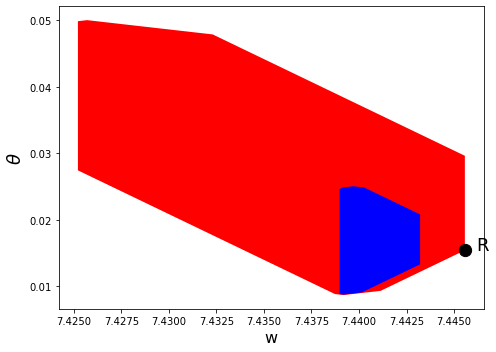

In [6]:
def plot_equilibria(ChangModel):
    """
    Method to plot both equilibrium sets
    """
    fig, ax = plt.subplots(figsize=(7, 5))

    ax.set_xlabel('w', fontsize=16)
    ax.set_ylabel(r"$\theta$", fontsize=18)

    poly_S = polytope.Polytope(ChangModel.H, ChangModel.c1_s)
    poly_C = polytope.Polytope(ChangModel.H, ChangModel.c1_c)
    ext_C = polytope.extreme(poly_C)
    ext_S = polytope.extreme(poly_S)

    ax.fill(ext_C[:, 0], ext_C[:, 1], 'r', zorder=-1)
    ax.fill(ext_S[:, 0], ext_S[:, 1], 'b', zorder=0)

    # Add point showing Ramsey Plan
    idx_Ramsey = np.where(ext_C[:, 0] == max(ext_C[:, 0]))[0][0]
    R = ext_C[idx_Ramsey, :]
    ax.scatter(R[0], R[1], 150, 'black', 'o', zorder=1)
    w_min = min(ext_C[:, 0])

    # Label Ramsey Plan slightly to the right of the point
    ax.annotate("R", xy=(R[0], R[1]),
                xytext=(R[0] + 0.03 * (R[0] - w_min),
                R[1]), fontsize=18)

    plt.tight_layout()
    plt.show()

plot_equilibria(ch1)

Evidently, the Ramsey plan, denoted by the $R$, is not sustainable.

Let's raise the discount factor and recompute the sets

In [7]:
ch2 = ChangModel(β=0.8, mbar=30, h_min=0.9, h_max=1/0.8,
    n_h=8, n_m=35, N_g=10)

In [8]:
ch2.solve_sustainable()

### --------------- ###
Solving Chang Model Using Outer Hyperplane Approximation
### --------------- ### 

Maximum difference when updating hyperplane levels:


[0.06369]


[0.02476]


[0.02153]


[0.01915]


[0.01795]


[0.01642]


[0.01507]


[0.01284]


[0.01106]


[0.00694]


[0.0085]


[0.00781]


[0.00433]


[0.00492]


[0.00303]


[0.00182]


[0.00638]


[0.00116]


[0.00093]


[0.00075]


[0.0006]


[0.00494]


[0.00038]


[0.00121]


[0.00024]


[0.0002]


[0.00016]


[0.00013]


[0.0001]


[0.00008]


[0.00006]


[0.00005]


[0.00004]


[0.00003]


[0.00003]


[0.00002]


[0.00002]


[0.00001]


[0.00001]


[0.00001]
Convergence achieved after 40 iterations and 709.12             seconds


Let's plot both sets

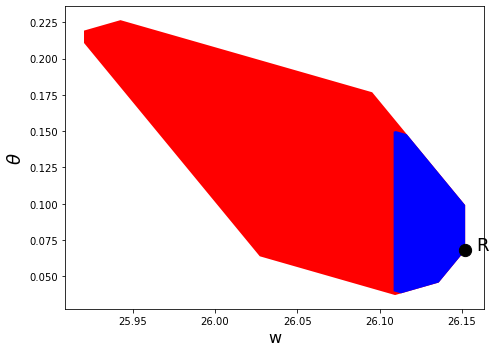

In [9]:
plot_equilibria(ch2)

Evidently, the Ramsey plan is now sustainable.